# 回帰とプロット

In [1]:
import numpy as np
from numpy.random import randn

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


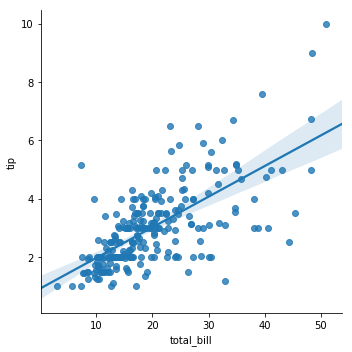

In [4]:
sns.lmplot('total_bill', 'tip', tips)

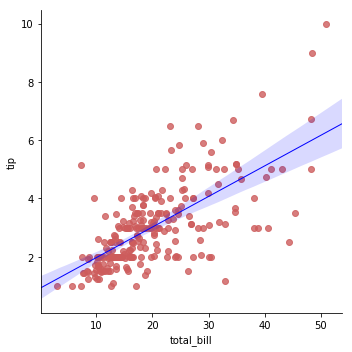

In [5]:
sns.lmplot('total_bill', 'tip', tips, scatter_kws={'marker': 'o', 'color': 'indianred'}, line_kws={'linewidth': 1, 'color': 'blue'})

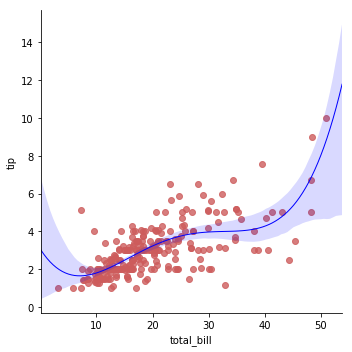

In [10]:
sns.lmplot('total_bill', 'tip', tips, order=4,
           scatter_kws={'marker': 'o', 'color': 'indianred'},
           line_kws={'linewidth': 1, 'color': 'blue'},
          )

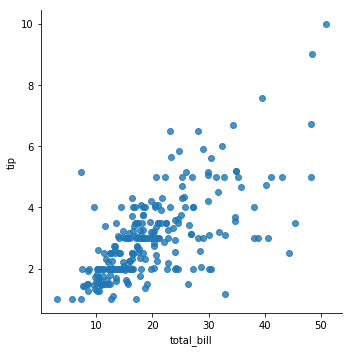

In [11]:
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [12]:
tips['tip_pect'] = 100*(tips['tip'] / tips['total_bill'])

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


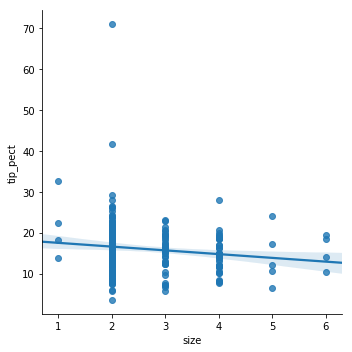

In [15]:
sns.lmplot('size', 'tip_pect', tips)

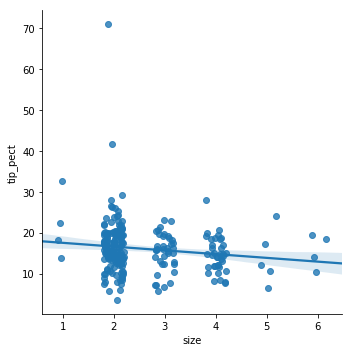

In [18]:
sns.lmplot('size', 'tip_pect', tips, x_jitter=0.2)

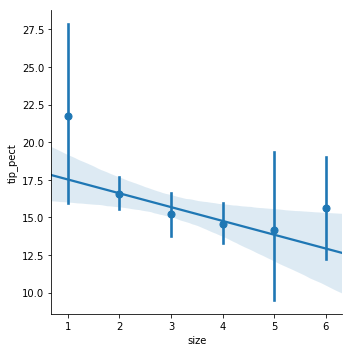

In [21]:
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean)

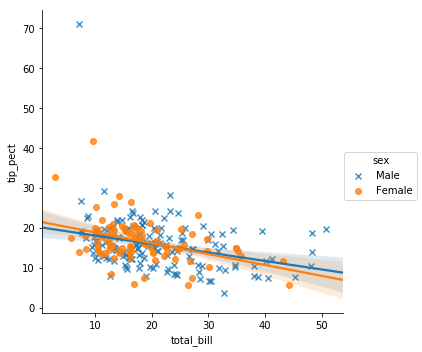

In [22]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

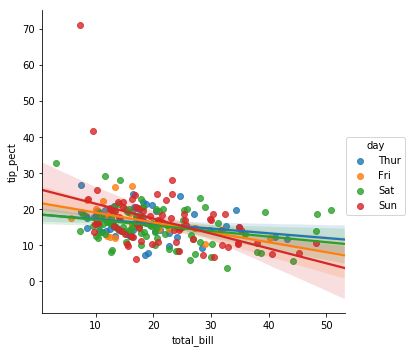

In [23]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

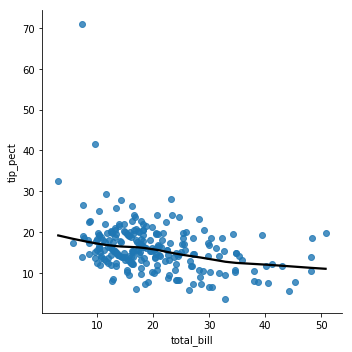

In [25]:
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True, line_kws={'color': 'black'})

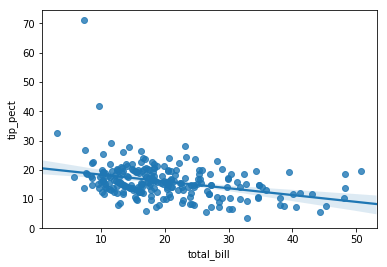

In [26]:
sns.regplot('total_bill', 'tip_pect', tips)

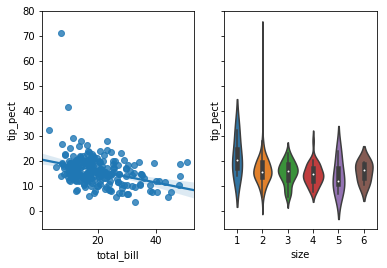

In [31]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips.sort_values('size') ,ax=axis2)

# ヒートマップとクラスタリング

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
flight_df = sns.load_dataset('flights')

In [43]:
flight_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
flight_df = flight_df.pivot('month','year','passengers')

In [45]:
flight_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


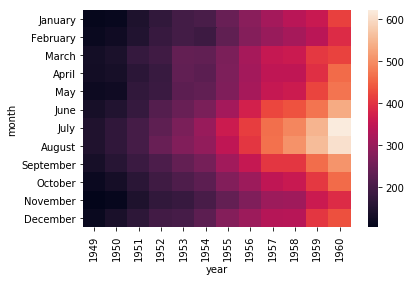

In [46]:
sns.heatmap(flight_df)

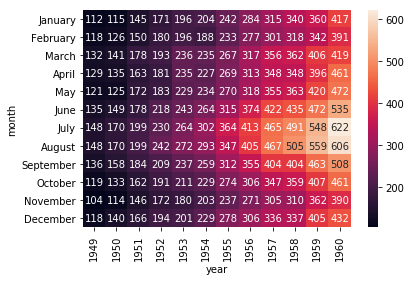

In [47]:
sns.heatmap(flight_df, annot=True, fmt='d')

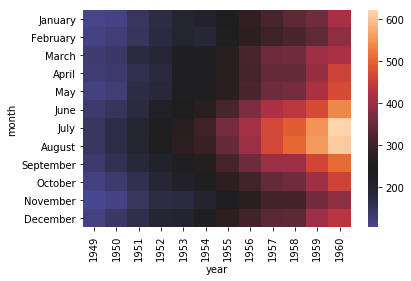

In [48]:
sns.heatmap(flight_df, center=flight_df.loc['January', 1955])

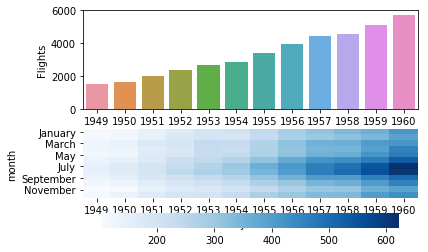

In [55]:
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_df.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_df, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

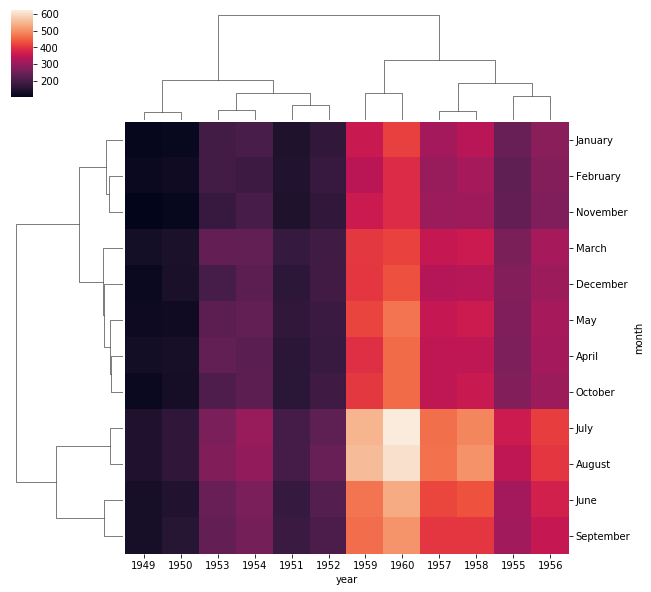

In [56]:
sns.clustermap(flight_df)

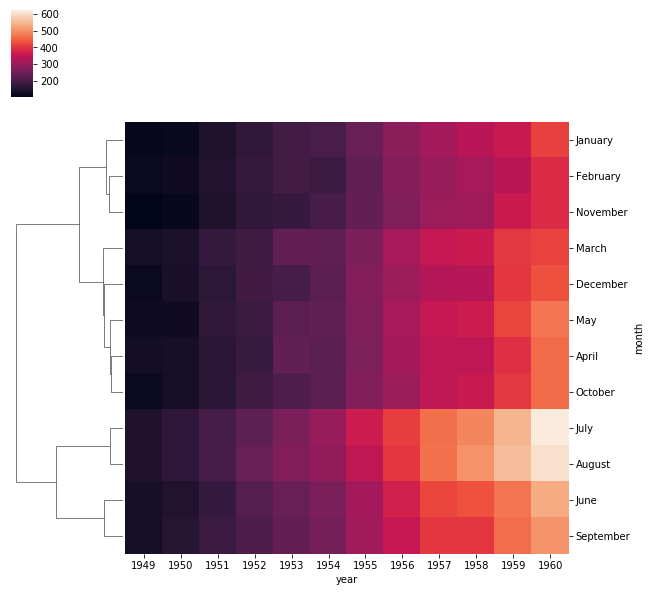

In [59]:
sns.clustermap(flight_df, col_cluster=False)

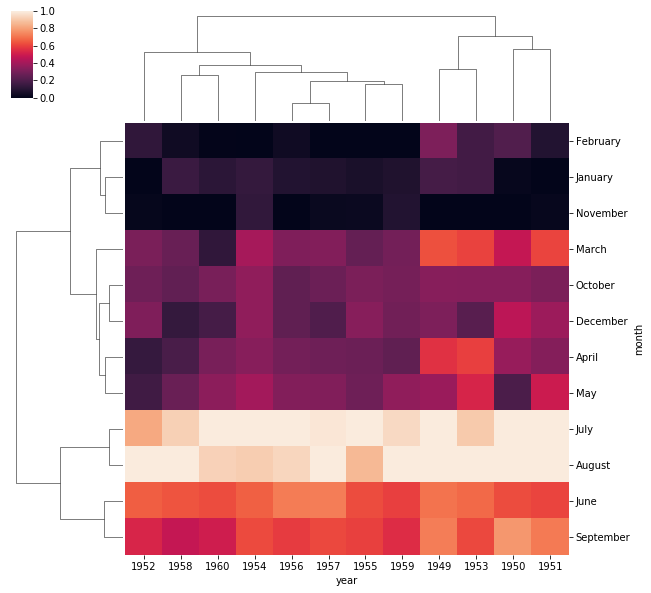

In [60]:
sns.clustermap(flight_df, standard_scale=1)

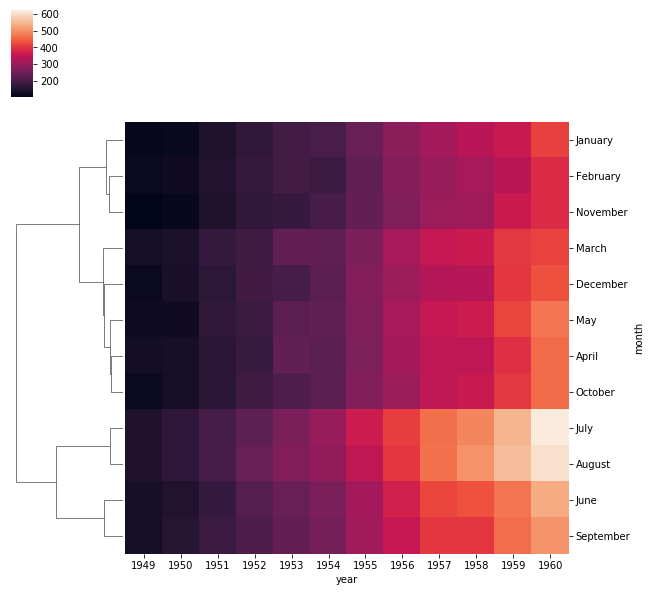

In [61]:
sns.clustermap(flight_df, col_cluster=0)

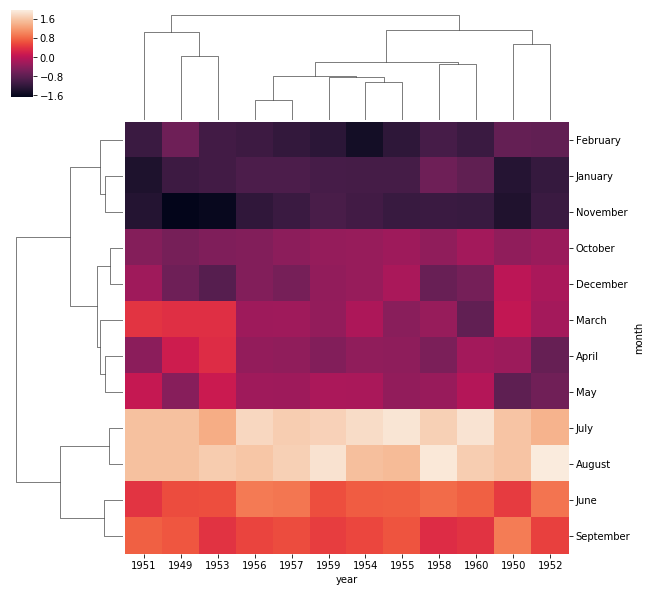

In [62]:
sns.clustermap(flight_df, z_score=1)